In [102]:
import h5py
# import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

from pathlib import Path

from PIL.ImageColor import colormap

np.random.seed(42)

In [103]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

$\frac{1}{2}\sum_{i=1}$

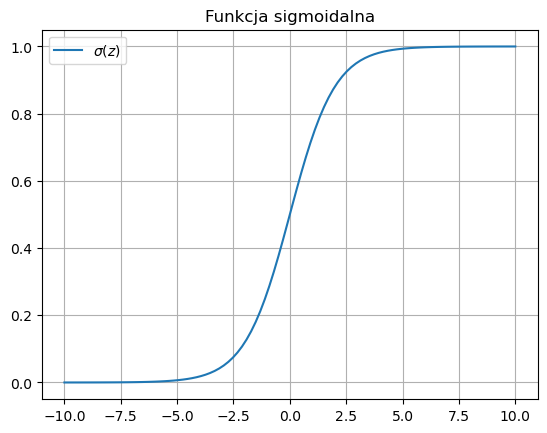

In [104]:
x=np.linspace(-10,10,100)
plt.plot(x,sigmoid(x), label = fr"$\sigma (z)$")
plt.grid(True)
plt.legend()
plt.title("Funkcja sigmoidalna")
plt.show()

In [105]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [106]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [107]:
iris.target.unique()

array([0, 1, 2])

In [108]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [109]:
X = iris.data
y = iris.target_names[iris.target] == 'virginica'

In [110]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X=X_train, y=y_train)

LogisticRegression(random_state=42)

In [112]:

log_reg.coef_

array([[-0.37075602, -0.50440372,  2.72707974,  2.02082242]])

In [113]:
log_reg.intercept_

array([-12.92813041])

In [114]:
y_pred = log_reg.predict(X=X_test)
y_pred

array([False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False])

In [115]:
log_reg.predict_proba(X=X_test)

array([[7.95728950e-01, 2.04271050e-01],
       [9.99991837e-01, 8.16299257e-06],
       [1.70865203e-03, 9.98291348e-01],
       [7.87905265e-01, 2.12094735e-01],
       [7.19597828e-01, 2.80402172e-01],
       [9.99992081e-01, 7.91900582e-06],
       [9.82408280e-01, 1.75917197e-02],
       [1.81532379e-01, 8.18467621e-01],
       [7.37577123e-01, 2.62422877e-01],
       [9.67067473e-01, 3.29325267e-02],
       [2.69410577e-01, 7.30589423e-01],
       [9.99994974e-01, 5.02552015e-06],
       [9.99997193e-01, 2.80716303e-06],
       [9.99993952e-01, 6.04795343e-06],
       [9.99994090e-01, 5.91002909e-06],
       [7.06373363e-01, 2.93626637e-01],
       [3.19343967e-02, 9.68065603e-01],
       [9.67918171e-01, 3.20818295e-02],
       [8.25611985e-01, 1.74388015e-01],
       [4.72384465e-02, 9.52761553e-01],
       [9.99990044e-01, 9.95641512e-06],
       [4.26237748e-01, 5.73762252e-01],
       [9.99987935e-01, 1.20645561e-05],
       [5.72121865e-02, 9.42787813e-01],
       [2.363476

In [116]:
log_reg.score(X=X_test, y=y_test)

1.0

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=log_reg.classes_)
cm

array([[26,  0],
       [ 0, 12]])

In [118]:
cm_df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred, labels=log_reg.classes_))
cm_df

,0,1
0,26,0
1,0,12


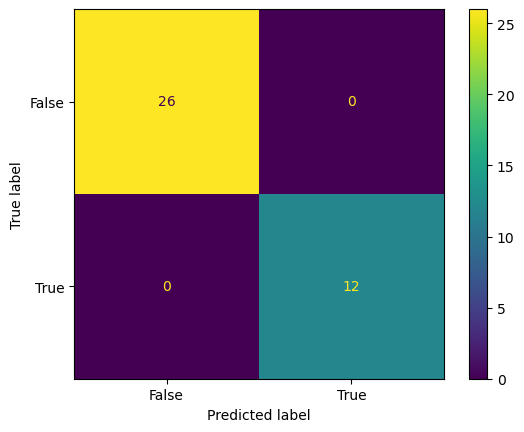

In [119]:
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_reg.classes_
)
cm_display.plot()

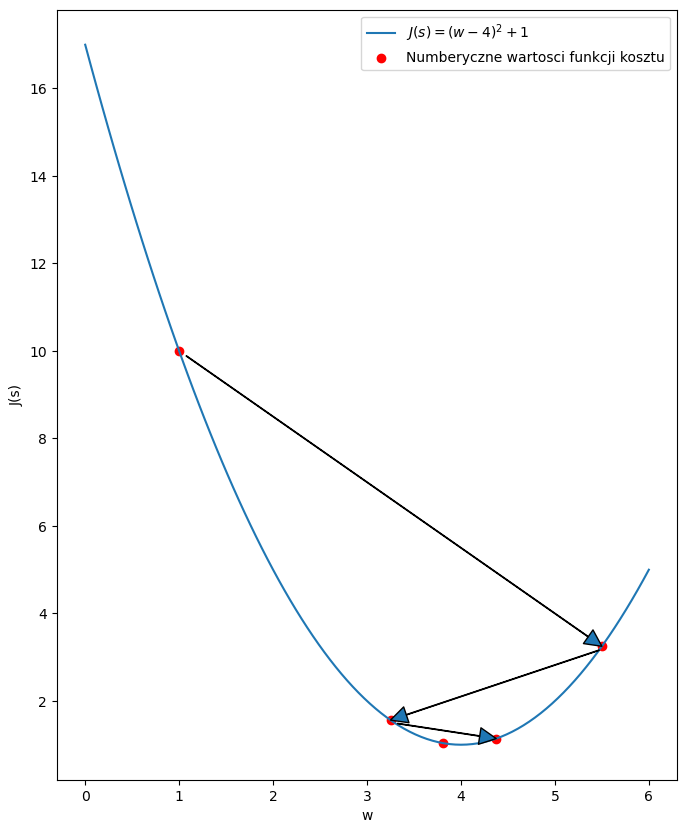

In [120]:
def JFunction(w):
    return (w-4)**2+1
def JDerivative(w):
    return 2*(w-4)

# popdunkt a) lambca = 1/3 lub 3/4
lr = 3/4
n_iter = 4
w = 1 
w_ls = [w]
J_ls = [JFunction(w)] # koszty
for i in range(n_iter):
    w = w - lr*JDerivative(w)
    w_ls.append(w)
    J_ls.append(JFunction(w))
    
w_ls

x=np.linspace(0,6,100)
plt.figure(figsize=(8,10))
plt.plot(x,JFunction(x), label = fr"$J(s)=(w-4)^2+1$")
plt.scatter(w_ls, J_ls, color='red', label="Numberyczne wartosci funkcji kosztu")
for i in range(n_iter-1):
    plt.annotate(" ", xy=(w_ls[i+1], J_ls[i+1]), xytext=(w_ls[i], J_ls[i]), arrowprops={"width": 0.3})

plt.xlabel("w")
plt.ylabel("J(s)")
plt.legend()
plt.show()

In [121]:
lr = 4/3
n_iter = 4
w = 1
w_ls=[w]
J_ls= [JFunction(w)] #koszty
for i in range(n_iter):
    w=w-lr*JDerivative(w)
    w_ls.append(w)
    J_ls.append(JFunction(w))

w_ls

[1, 9.0, -4.333333333333332, 17.888888888888886, -19.148148148148138]

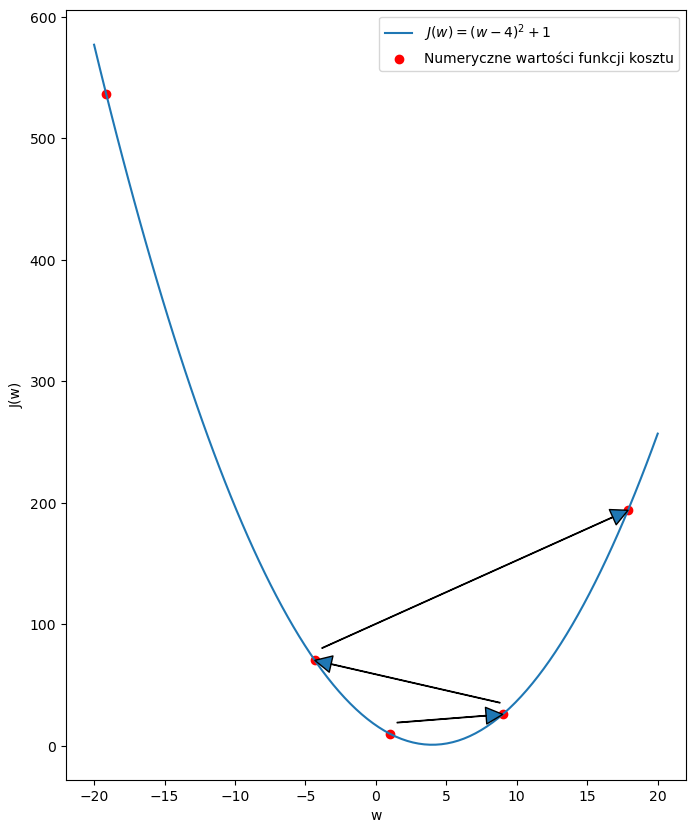

In [122]:
x=np.linspace(-20,20,100)
plt.figure(figsize=(8,10))
plt.plot(x, JFunction(x), label=fr"$J(w)=(w-4)^2+1$")
plt.scatter(w_ls, J_ls, color="red", label = "Numeryczne wartości funkcji kosztu")
for i in range(n_iter-1):
    plt.annotate(" ",xy=(w_ls[i+1], J_ls[i+1]), xytext=(w_ls[i], J_ls[i]), arrowprops={"width": 0.3})
plt.xlabel("w")
plt.ylabel("J(w)")
plt.legend()
plt.show()

In [123]:
X = np.array([
    [1, -2, -1],
    [3, 0.5, -3.2]
])

Y = np.array([
    [1, 1, 0]
])

In [124]:
print(X.shape)
print(Y.shape)

(2, 3)
(1, 3)


In [125]:
m=X.shape[1]
m

3

In [126]:
w0 = np.array([
    [1],
    [2]
])
b0=1.5
w, b=w0, b0

In [127]:
print(w.shape)

(2, 1)


In [128]:
C = np.array(
    [1, 2, 3]
)
D = np.array(
    [2, 3, 4]
    )
np.dot(C,D)

20

In [129]:
C.shape

(3,)

In [130]:
Z=np.matmul(w.T,X)+b
Z

array([[ 8.5,  0.5, -5.9]])

In [131]:
for item in [w.T, X, np.dot(w.T,X)]:
    print(item.shape)
print(b)

(1, 2)
(2, 3)
(1, 3)
1.5


In [132]:
Z.shape

(1, 3)

In [133]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

A=sigmoid(Z)
A

array([[0.99979657, 0.62245933, 0.00273196]])

In [134]:
A.shape

(1, 3)

In [135]:
Y.shape

(1, 3)

In [136]:
print(Y.ndim)
print(A.ndim)

2
2


In [137]:
print(Y.reshape(3))
print(Y.reshape(3).shape)
print(Y.reshape(3).ndim)

[1 1 0]
(3,)
1


In [138]:
print(Y.reshape(-1))
print(Y.reshape(-1).shape)
print(Y.reshape(-1).ndim)

[1 1 0]
(3,)
1


In [139]:
J=(
    -1/m*(np.dot(Y.reshape(-1), np.log(A).reshape(-1))
                 + np.dot((1-Y).reshape(-1), np.log(1-A).reshape(-1)))
)
J

0.15900537707692405

In [140]:
1-Y

array([[0, 0, 1]])

In [141]:
J=1/m*(np.matmul(Y,np.log(A).T) + np.matmul((1-Y), np.log(1-A).T))
print(J)
print(J.shape)

[[-0.15900538]]
(1, 1)


In [142]:
J=J[0][0]
J

-0.15900537707692405

In [143]:
dJdb = (A-Y).mean()
dJdb

-0.12500404500439652

In [144]:
print(X.shape)
print((A-Y).T.shape)

(2, 3)
(3, 1)


In [145]:
dJdw = 1/m*np.matmul(X, (A-Y).T)
dJdw

array([[ 0.25071532],
       [-0.06604096]])

In [146]:
print(dJdw.shape)
print(w.shape)

(2, 1)
(2, 1)


In [147]:
lr = 0.001
b = b - lr*dJdb
w = w - lr*dJdb

In [148]:
print(f"b={b}")
print(f"w={w}")

b=1.5001250040450045
w=[[1.000125]
 [2.000125]]


In [149]:
def LogisticRegressionBGD(X, Y, lr=0.009, iter =10, w_init = None, b_init = None):
    n = X.shape[0]
    m = X.shape[1]
    if w_init is None:
        w = np.random.rand(n,1)
    else:
        w = w_init
    if b_init is None:
        b=np.random.rand()
    else:
        b=b_init
    b_ls = [b]
    w_ls = [w]
    J_ls =[]

    for i in range(iter):
        Z=np.matmul(w.T,X)+b
        A=sigmoid(Z)
        J=-1/m*(np.matmul(Y, np.log(A).T) + np.matmul((1-Y), np.log(1-A).T))[0][0]
        dJdb = (A-Y).mean()
        dJdw = 1/m*np.matmul(X, (A-Y).T)
        b=b-lr*dJdb
        w=w-lr*dJdw
        b_ls.append(b)
        w_ls.append(w)
        J_ls.append(J)
    return b,w,b_ls,w_ls,J_ls


In [150]:
n_iter = 100

In [151]:
b_optimal, w_optimal, b_values_ls, w_values_ls, J_values_ls = LogisticRegressionBGD(
    X, Y, iter=n_iter, w_init=w0, b_init=b0
)

In [152]:
print(f"b={b_optimal}")
print(f"w={w_optimal}")

b=1.5948713189708588
w=[[0.80956046]
 [2.0508202 ]]


In [153]:
b_values_ls[:5]

[1.5,
 1.5011250364050395,
 1.502245879053189,
 1.5033625495626266,
 1.5044750694627869]

In [154]:
w_values_ls[:5]

[array([[1],
        [2]]),
 array([[0.99774356],
        [2.00059437]]),
 array([[0.9954955 ],
        [2.00118668]]),
 array([[0.99325577],
        [2.00177696]]),
 array([[0.99102432],
        [2.0023652 ]])]

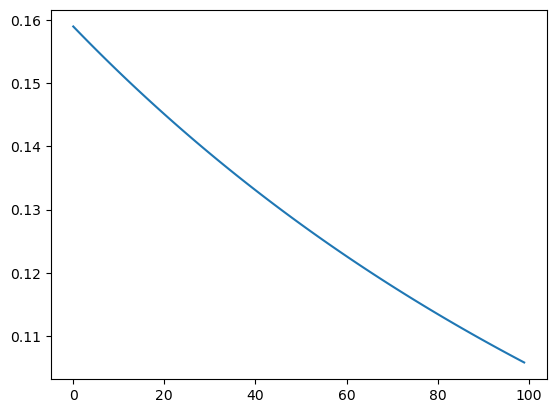

In [155]:
plt.plot(J_values_ls)
plt.show()

In [156]:
Y_pred = np.zeros((1,m))
print(Y_pred)
print(Y_pred.shape)

[[0. 0. 0.]]
(1, 3)


In [157]:
Z=np.matmul(w_optimal.T, X)+b_optimal
A=sigmoid(Z)
A

array([[0.99980782, 0.73128668, 0.00308746]])

In [158]:
for i in range(m):
    if A[0,i] >= 0.5:
        Y_pred[0,i]=1
    else:
        Y_pred[0,i]=0
Y_pred

array([[1., 1., 0.]])

In [159]:
Y_pred = np.round(A)
Y_pred

array([[1., 1., 0.]])

In [160]:
def predict(w, b, X, p_treshold = 0.5):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    Z = np.matmul(w.T, X)+b
    A = sigmoid(Z)
    for i in range(m):
        if A[0,i] >= p_treshold:
            Y_pred[0,i]=1
        else:
            Y_pred[0,i]=0
    return Y_pred
predict(w_optimal, b_optimal, X)


array([[1., 1., 0.]])

In [161]:
class LogisticRegressionBGDClassifier():
    def fit(self, X, Y, lr=0.009, iter = 10, w_init = None, b_init = None, verbose = False):
        n = X.shape[0]
        m = X.shape[1]
        if w_init is None:
            w = np.random.rand(n,1)
        else:
            w = w_init
        if b_init is None:
            b=np.random.rand()
        else:
            b=b_init
        b_ls = [b]
        w_ls = [w]
        J_ls =[]

        for i in range(iter):
            Z=np.matmul(w.T,X)+b
            A=sigmoid(Z)
            J=-1/m*(np.matmul(Y, np.log(A).T) + np.matmul((1-Y), np.log(1-A).T))[0][0]
            dJdb = (A-Y).mean()
            dJdw = 1/m*np.matmul(X, (A-Y).T)
            b=b-lr*dJdb
            w=w-lr*dJdw
            b_ls.append(b)
            w_ls.append(w)
            J_ls.append(J)
            if verbose and (i % 100 == 0):
                print(f"Cost after iteration {i}: {J.round(6)}")

        self.intercept_ = b
        self.coef_ = w
        self.costs_ = J_ls

    def predict(self, X, p_treshold = 0.5):
        m = X.shape[1]
        Y_pred = np.zeros((1,m))
        Z = np.matmul(self.coef_.T, X)+self.intercept_
        A = sigmoid(Z)
        for i in range(m):
            if A[0,i] >= p_treshold:
                Y_pred[0,i]=1
            else:
                Y_pred[0,i]=0
        return Y_pred

    def predict_proba(self, X):
        Z = np.matmul(self.coef_.T, X)+self.intercept_
        A = sigmoid(Z)
        return A

    def score(self, X, y):
        Y_pred = self.predict(X, p_treshold = 0.5)
        return 1 - np.mean(np.abs(Y_pred - y))


lr_bdg = LogisticRegressionBGDClassifier()
lr_bdg.fit(X, Y, iter = n_iter, w_init = w0, b_init = b0)
print(lr_bdg.intercept_)
print(lr_bdg.coef_)



1.5948713189708588
[[0.80956046]
 [2.0508202 ]]


In [162]:
lr_bdg.predict(X)

array([[1., 1., 0.]])

In [163]:
lr_bdg.predict_proba(X)

array([[0.99980782, 0.73128668, 0.00308746]])

In [164]:
train_dataset = h5py.File("data/lr/train_catvnoncat.h5", "r")
test_dataset = h5py.File("data/lr/test_catvnoncat.h5", "r")

In [165]:
print(train_dataset.keys())
print(test_dataset.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [166]:
X_train = train_dataset["train_set_x"][:] # Use [:] to select all dataset
y_train = train_dataset["train_set_y"][:]
X_test = test_dataset["test_set_x"][:]
y_test = test_dataset["test_set_y"][:]
classes = train_dataset["list_classes"][:]

In [167]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [168]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)


In [169]:
num_px = X_train.shape[1]
num_px

64

In [170]:
index = 2
X_train[index]

array([[[ 82,  71,  68],
        [ 89,  83,  83],
        [100,  98, 104],
        ...,
        [131, 132, 137],
        [126, 124, 124],
        [105,  97,  95]],

       [[ 95,  91,  97],
        [104, 104, 113],
        [110, 115, 126],
        ...,
        [135, 134, 135],
        [127, 122, 119],
        [111, 105, 103]],

       [[ 94,  85,  83],
        [ 97,  89,  90],
        [110, 109, 115],
        ...,
        [136, 134, 131],
        [127, 120, 117],
        [116, 108, 104]],

       ...,

       [[ 96, 116, 131],
        [ 97, 115, 130],
        [103, 123, 139],
        ...,
        [152, 155, 157],
        [146, 149, 152],
        [130, 133, 134]],

       [[ 90, 108, 123],
        [ 92, 108, 121],
        [100, 119, 134],
        ...,
        [150, 152, 155],
        [144, 146, 147],
        [134, 135, 134]],

       [[ 86, 102, 116],
        [ 87, 103, 115],
        [ 94, 114, 127],
        ...,
        [154, 156, 160],
        [146, 148, 152],
        [138, 141, 142]]

Wartosc etykiety: 1
This is a b'cat' picture.


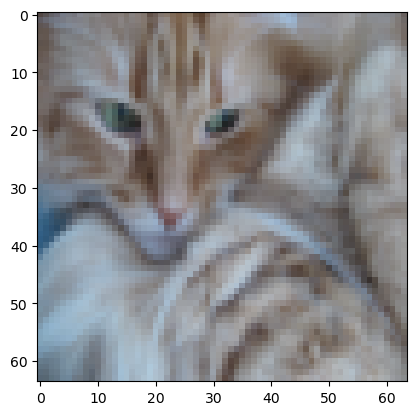

In [171]:
plt.imshow(X_train[index])
print(f"Wartosc etykiety: {y_train[index]}")
print(f"This is a {classes[y_train[index]]} picture.")

In [172]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [173]:
X_3x3 = np.array(
    [
        [1,2,3],
        [4,5,6],
        [7,8,9],
    ]
)

X_3x3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [174]:
X_3x3.reshape(9,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [175]:
X_3x3.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [176]:
X_train.shape

(209, 64, 64, 3)

In [177]:
X_train = X_train.reshape(X_train.shape[0], -1).T
X_train.shape

(12288, 209)

In [178]:
X_test = X_test.reshape(X_test.shape[0], -1).T
X_test.shape

(12288, 50)

In [179]:
X_train = X_train / 255
X_test = X_test / 255

X_train

array([[0.06666667, 0.76862745, 0.32156863, ..., 0.56078431, 0.08627451,
        0.03137255],
       [0.12156863, 0.75294118, 0.27843137, ..., 0.60784314, 0.09411765,
        0.10980392],
       [0.21960784, 0.74509804, 0.26666667, ..., 0.64705882, 0.09019608,
        0.20784314],
       ...,
       [0.        , 0.32156863, 0.54117647, ..., 0.33333333, 0.01568627,
        0.        ],
       [0.        , 0.31372549, 0.55294118, ..., 0.41960784, 0.01960784,
        0.        ],
       [0.        , 0.31764706, 0.55686275, ..., 0.58431373, 0.        ,
        0.        ]])

In [180]:
X_test.shape

(12288, 50)

In [181]:
print(y_train.shape)
print(y_test.shape)

(209,)
(50,)


In [182]:
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [183]:
print(y_train.shape)
print(y_test.shape)

(1, 209)
(1, 50)


In [184]:
lr = 0.005
n_iter = 2000
w0, b0 = np.zeros((X_train.shape[0], 1)), 0.0
lr_bgd_clf = LogisticRegressionBGDClassifier()
lr_bgd_clf.fit(X=X_train, Y=y_train, lr=lr, iter=n_iter, w_init=w0, b_init=b0, verbose=True)
print(f"b = {lr_bgd_clf.intercept_}")
print(f"w = {lr_bgd_clf.coef_}")

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.27988
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.21482
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
b = -0.01590624399969298
w = [[ 0.00961402]
 [-0.0264683 ]
 [-0.01226513]
 ...
 [-0.01144453]
 [-0.02944783]
 [ 0.02378106]]


In [ ]:
print(f"Train accuracy: {lr_bgd_clf.score(X=X_train, y=y_train)}")
print(f"Test accuracy: {lr_bgd_clf.score(X=X_test, y=y_test)}")


In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_pred = lr_bgd_clf.predict(X_test)
index = 5
plt.imshow(X_test[:, index].reshape((num_px, num_px, 3)))
print(f"y = {y_test[0,index]}, it means this is a {classes[y_test[0,index]]} picture.")
print(f"y = {y_pred[0,index]}, it means a model precited this is a {classes[int(y_pred[0,index])]} picture")

In [ ]:
plt.plot(lr_bgd_clf.costs_)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title("Cost on training data")
plt.show()

In [ ]:
plt.plot(lr_bgd_clf.costs_)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title("Cost on training data")
plt.xlim(0,250)
plt.show()

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    print(f"Training a model with learning rate: {lr}")
    lr_bgd = LogisticRegressionBGDClassifier()
    lr_bgd.fit(X=X_train, Y=y_train, lr = lr, iter=n_iter, w_init=w0, b_init=b0, verbose=False)
    plt.plot(lr_bgd.costs_, label=f"learrning rate = {lr}")


plt.ylabel('Cost')
plt.xlabel("Iteration")
plt.title("Cost on training data dpending on learning rate")
plt.legend()
plt.show()

In [ ]:
filename = "my_image.jpg"
filepath = "data/" + filename
my_image = np.array(Image.open(filepath).resize(
    (num_px, num_px)))
print(my_image.shape)
plt.imshow(my_image)
my_image = my_image / 255
my_image = my_image.reshape((1, num_px * num_px * 3)).T

In [ ]:
my_image.shape

In [ ]:
y_pred = lr_bgd_clf.predict(my_image)
print(f"y = {y_pred[0,0]} it means a model predicted this is a {classes[int(y_pred[0,0])]} picture.")